In [6]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [7]:
# loading dataset
df = pd.read_csv(r"C:\Users\aadit\OneDrive\Desktop\Telecom Churn Project\Dataset\customer_churn_raw.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# Dataset Overview

In [9]:
df.shape

(7043, 21)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
# checking null value
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
# checking duplicate values
df.duplicated().sum()

np.int64(0)

In [ ]:
# Churn Distribution

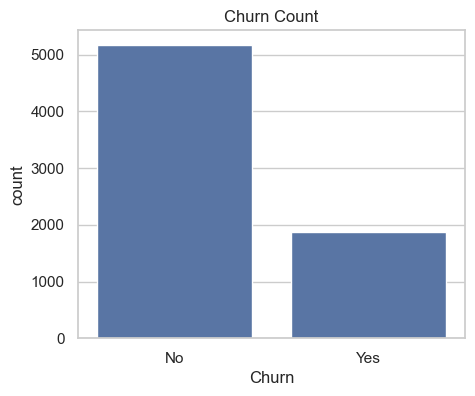

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [14]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Churn')
plt.title("Churn Count")
plt.show()

df['Churn'].value_counts(normalize=True) * 100


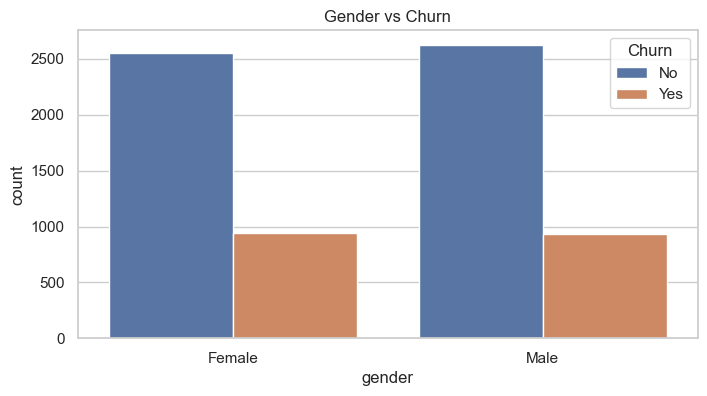

In [15]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='gender', hue='Churn')
plt.title("Gender vs Churn")
plt.show()


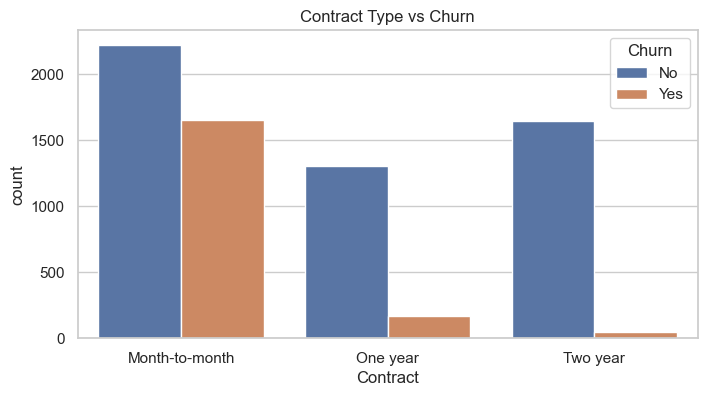

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Contract Type vs Churn")
plt.show()


In [ ]:
# Convert TotalCharges to numeric

In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [14]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [16]:
# dropping customerID column
df = df.drop(columns=['customerID'])

In [17]:
# Convert target column Churn to binary (Yes → 1, No → 0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [18]:
# Split features into numerical & categorical
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

num_cols, cat_cols

(Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object'),
 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod'],
       dtype='object'))

In [19]:
# One-Hot Encode categorical variables
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [20]:
# Train-test split
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


In [21]:
# Model Training & Evaluation

In [25]:
import sys
!{sys.executable} -m pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 10.2 MB/s eta 0:00:08
   - -------------------------------------- 3.4/72.0 MB 14.1 MB/s eta 0:00:05
   ---- ----------------------------------- 8.1/72.0 MB 17.8 MB/s eta 0:00:04
   ------- -------------------------------- 13.1/72.0 MB 19.3 MB/s eta 0:00:04
   ----------- ---------------------------- 19.9/72.0 MB 22.6 MB/s eta 0:00:03
   --------------- ------------------------ 27.0/72.0 MB 25.0 MB/s eta 0:00:02
   ------------------- -------------------- 34.6/72.0 MB 26.7 MB/s eta 0:00:02
   ---------------------- ----------------- 40.6/72.0 MB 27.2 MB/s eta 0:00:02
   -------------------------- ------------- 47.7/72.0 MB 27.7 MB/s eta 0:00:01
   ----------------------------- ---------- 52.4/72.0 MB 27.0 MB/s eta 0:00:01
   --------------------------------- ------ 61.1/72.0 MB 28.4 MB/s eta 0:00:01
   -------------------------------------- - 68.4/72.0 MB 29.2 MB


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: C:\Users\aadit\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [26]:
# Import required ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [27]:
# Train Logistic Regression
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)

C:\Users\aadit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)

In [29]:
# Train XGBoost
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train, y_train)

pred_xgb = xgb.predict(X_test)

In [30]:
# Evaluate all models
def evaluate_model(y_test, y_pred):
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))


In [31]:
print("Logistic Regression:")
evaluate_model(y_test, pred_lr)

print("\nRandom Forest:")
evaluate_model(y_test, pred_rf)

print("\nXGBoost:")
evaluate_model(y_test, pred_xgb)


Logistic Regression:
Accuracy: 0.8048261178140526
Precision: 0.6542056074766355
Recall: 0.5614973262032086
F1 Score: 0.60431654676259

Random Forest:
Accuracy: 0.7899219304471257
Precision: 0.6335616438356164
Recall: 0.4946524064171123
F1 Score: 0.5555555555555556

XGBoost:
Accuracy: 0.7849538679914834
Precision: 0.60790273556231
Recall: 0.5347593582887701
F1 Score: 0.5689900426742532


In [32]:
# Highest Accuracy → Logistic Regression (0.8048)
# Highest Precision → Logistic Regression (0.6542)
# Highest Recall → Logistic Regression (0.5615)
# Highest F1 Score → Logistic Regression (0.6043)

# Logistic Regression performed the best overall for your Telecom Churn dataset.

In [33]:
# Logistic Regression outperformed Random Forest and XGBoost with the highest accuracy (80.48%) and balanced 
#performance across precision, recall, and F1 score.The model generalizes well and is less prone to overfitting compared 
#to tree-based models on this dataset. Therefore, Logistic Regression was selected as the final model for predicting customer churn.

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Hyperparameter Grid
params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000]
}

log_reg = LogisticRegression()

grid = GridSearchCV(log_reg, params, scoring='f1', cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

best_log_reg = grid.best_estimator_
y_pred_best = best_log_reg.predict(X_test)

print("🔹 Best Parameters:", grid.best_params_)
print("🔹 Accuracy:", accuracy_score(y_test, y_pred_best))
print("🔹 Precision:", precision_score(y_test, y_pred_best))
print("🔹 Recall:", recall_score(y_test, y_pred_best))
print("🔹 F1 Score:", f1_score(y_test, y_pred_best))


🔹 Best Parameters: {'C': 10, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
🔹 Accuracy: 0.8026969481902059
🔹 Precision: 0.65
🔹 Recall: 0.5561497326203209
🔹 F1 Score: 0.5994236311239193


C:\Users\aadit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aadit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aadit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\aadit\AppDa

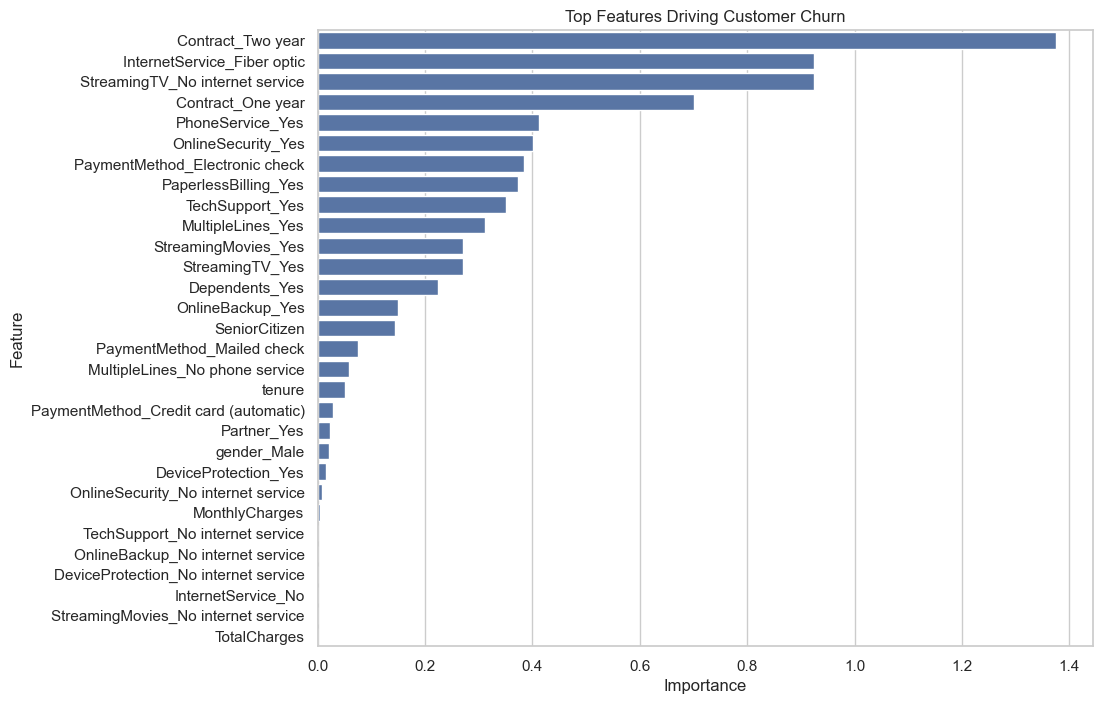

In [35]:
# Feature Importance & Key Drivers of Customer Churn
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importance (Logistic Regression → coefficients)
coeff = best_log_reg.coef_[0]
features = X.columns

importance_df = pd.DataFrame({"Feature": features, "Coefficient": coeff})
importance_df['Importance'] = abs(importance_df['Coefficient'])
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Top Features Driving Customer Churn")
plt.show()


In [40]:
import os
os.makedirs("../artifacts", exist_ok=True)


In [42]:
import os
import pickle

model_path = "../artifacts/model.pkl"

with open(model_path, "wb") as f:
    pickle.dump(best_log_reg, f)

print("Model saved successfully at:", model_path)


Model saved successfully at: ../artifacts/model.pkl


In [43]:
X.columns


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [44]:
# Final Streamlit App (Full Feature Engineering + Prediction)

In [50]:
import sys
print(sys.executable)
!{sys.executable} -m pip install streamlit

C:\Users\aadit\AppData\Local\Programs\Python\Python313\python.exe
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/9.0 MB ? eta -:--:--
   ----------- ---------------------------- 2.6/9.0 MB 16.0 MB/s eta 0:00:01
   -------------------------- ------------- 6.0/9.0 MB 18.1 MB/s eta 0:00:01
   ---------------------------------------- 9.0/9.0 MB 15.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/795.4 kB ? eta -:--:--
   --------------------------------------- 795.4/795.4 kB 32.9 MB/s eta 0:00:00
Using cached blinker-1.9.0-py3-none-any.whl (8.5 kB)
   ---------------------------------------- 0.0/28.0 MB ? eta -:--:--
   --- ------------------------------------ 2.6/28.0 MB 27.2 MB/s eta 0:00:01
   ----------- ---------------------------- 7.9/28.0 MB 20.2 MB/s eta 0:00:01
   ---------------- ----------------------- 11.5/28.0 MB 19.5 MB/s eta 0:00:01
   ---------------------- ----------------- 15.5/28.0 MB 19.2


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: C:\Users\aadit\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [ ]:
import streamlit as st
import pickle
import numpy as np
import pandas as pd

# Load model
model = pickle.load(open("../artifacts/model.pkl", "rb"))

# Final column order (same as training)
final_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

st.title("📞 Telecom Customer Churn Prediction App")
st.write("Fill the customer details below to predict whether the customer will churn or not.")

# --------------------- USER INPUT FIELDS ---------------------
gender = st.selectbox("Gender", ["Female", "Male"])
senior = st.selectbox("Senior Citizen", ["No", "Yes"])
partner = st.selectbox("Partner", ["No", "Yes"])
dependents = st.selectbox("Dependents", ["No", "Yes"])
tenure = st.number_input("Tenure (Months)", min_value=0, max_value=100, value=1)
phone = st.selectbox("Phone Service", ["No", "Yes"])
multiple_lines = st.selectbox("Multiple Lines", ["No phone service", "No", "Yes"])
internet = st.selectbox("Internet Service", ["DSL", "Fiber optic", "No"])
online_security = st.selectbox("Online Security", ["No internet service", "No", "Yes"])
online_backup = st.selectbox("Online Backup", ["No internet service", "No", "Yes"])
device_protection = st.selectbox("Device Protection", ["No internet service", "No", "Yes"])
tech_support = st.selectbox("Tech Support", ["No internet service", "No", "Yes"])
streaming_tv = st.selectbox("Streaming TV", ["No internet service", "No", "Yes"])
streaming_movies = st.selectbox("Streaming Movies", ["No internet service", "No", "Yes"])
contract = st.selectbox("Contract", ["Month-to-month", "One year", "Two year"])
paperless = st.selectbox("Paperless Billing", ["No", "Yes"])
payment = st.selectbox("Payment Method", [
    "Bank transfer (automatic)",
    "Credit card (automatic)",
    "Electronic check",
    "Mailed check"
])
monthly_charges = st.number_input("Monthly Charges", min_value=0.0, max_value=200.0, value=50.0)
total_charges = st.number_input("Total Charges", min_value=0.0, max_value=10000.0, value=1000.0)

# --------------- CREATE INPUT DATA FRAME ---------------------
data = pd.DataFrame(columns=final_columns)

# Numeric fields
data.at[0, 'SeniorCitizen'] = 1 if senior == "Yes" else 0
data.at[0, 'tenure'] = tenure
data.at[0, 'MonthlyCharges'] = monthly_charges
data.at[0, 'TotalCharges'] = total_charges

# One-hot encoded categorical fields
data.at[0, 'gender_Male'] = 1 if gender == "Male" else 0
data.at[0, 'Partner_Yes'] = 1 if partner == "Yes" else 0
data.at[0, 'Dependents_Yes'] = 1 if dependents == "Yes" else 0
data.at[0, 'PhoneService_Yes'] = 1 if phone == "Yes" else 0

data.at[0, 'MultipleLines_No phone service'] = 1 if multiple_lines == "No phone service" else 0
data.at[0, 'MultipleLines_Yes'] = 1 if multiple_lines == "Yes" else 0

data.at[0, 'InternetService_Fiber optic'] = 1 if internet == "Fiber optic" else 0
data.at[0, 'InternetService_No'] = 1 if internet == "No" else 0

data.at[0, 'OnlineSecurity_No internet service'] = 1 if online_security == "No internet service" else 0
data.at[0, 'OnlineSecurity_Yes'] = 1 if online_security == "Yes" else 0

data.at[0, 'OnlineBackup_No internet service'] = 1 if online_backup == "No internet service" else 0
data.at[0, 'OnlineBackup_Yes'] = 1 if online_backup == "Yes" else 0

data.at[0, 'DeviceProtection_No internet service'] = 1 if device_protection == "No internet service" else 0
data.at[0, 'DeviceProtection_Yes'] = 1 if device_protection == "Yes" else 0

data.at[0, 'TechSupport_No internet service'] = 1 if tech_support == "No internet service" else 0
data.at[0, 'TechSupport_Yes'] = 1 if tech_support == "Yes" else 0

data.at[0, 'StreamingTV_No internet service'] = 1 if streaming_tv == "No internet service" else 0
data.at[0, 'StreamingTV_Yes'] = 1 if streaming_tv == "Yes" else 0

data.at[0, 'StreamingMovies_No internet service'] = 1 if streaming_movies == "No internet service" else 0
data.at[0, 'StreamingMovies_Yes'] = 1 if streaming_movies == "Yes" else 0

data.at[0, 'Contract_One year'] = 1 if contract == "One year" else 0
data.at[0, 'Contract_Two year'] = 1 if contract == "Two year" else 0
data.at[0, 'PaperlessBilling_Yes'] = 1 if paperless == "Yes" else 0

data.at[0, 'PaymentMethod_Credit card (automatic)'] = 1 if payment == "Credit card (automatic)" else 0
data.at[0, 'PaymentMethod_Electronic check'] = 1 if payment == "Electronic check" else 0
data.at[0, 'PaymentMethod_Mailed check'] = 1 if payment == "Mailed check" else 0

# --------------------- PREDICTION ---------------------
if st.button("Predict Churn"):
    prediction = model.predict(data)[0]
    if prediction == 1:
        st.error("❌ Customer is likely to churn")
    else:
        st.success("✔ Customer is not likely to churn")
